In [33]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import KLDivergence
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [34]:
import pathlib
unhealthy_dir = pathlib.Path("data/normal/unhealthy")
healthy_dir = pathlib.Path("data/normal/healthy")

In [35]:
dirlist = [unhealthy_dir, healthy_dir]
classes=['No', 'Yes']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  3256    labels:  3256


In [36]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
df=pd.DataFrame(np.array(df).reshape(3256,2), columns = ['filepaths', 'labels'])
df.head()

,filepaths,labels
0,data\normal\unhealthy\WBC-Malignant-Early-001.jpg,No
1,data\normal\unhealthy\WBC-Malignant-Early-002.jpg,No
2,data\normal\unhealthy\WBC-Malignant-Early-003.jpg,No
3,data\normal\unhealthy\WBC-Malignant-Early-004.jpg,No
4,data\normal\unhealthy\WBC-Malignant-Early-005.jpg,No


In [37]:
print(df['labels'].value_counts())

labels
No     2752
Yes     504
Name: count, dtype: int64


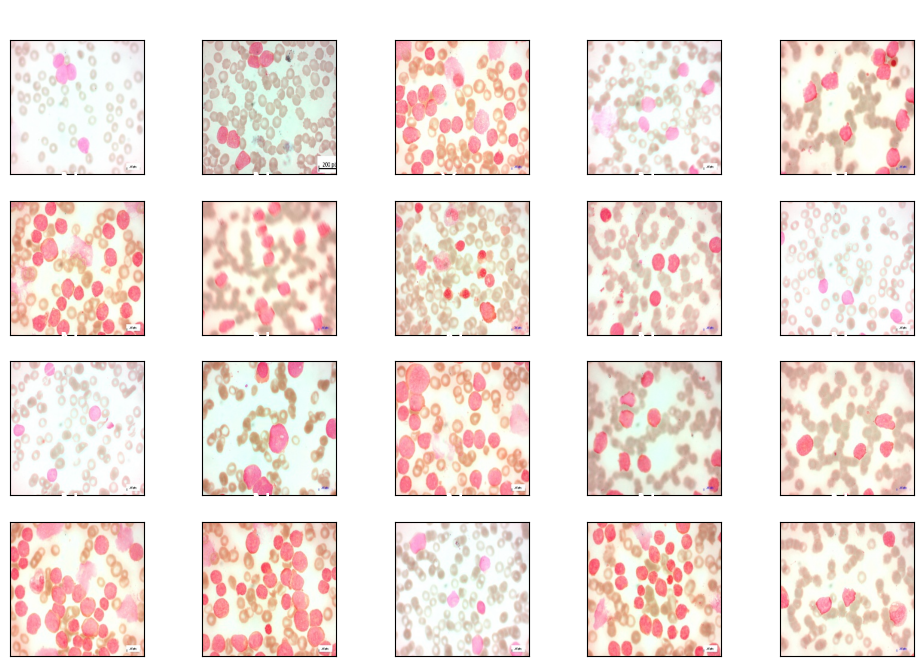

In [38]:
plt.figure(figsize=(12,8))
for i in range(20):
    random = np.random.randint(1,len(df))
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.imread(df.loc[random,"filepaths"]))
    plt.title(df.loc[random, "labels"], size = 20, color = "white") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [42]:
labels = ['UNHEALTHY', 'HEALTHY']
img_size = 50
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [43]:
import glob
images_dict = {
    'unhealthy': list(unhealthy_dir.glob('*')) ,   
    'healthy': list(healthy_dir.glob('*'))  
}

labels_dict = {
    'unhealthy': "unhealthy",
    'healthy': "healthy",
    
}

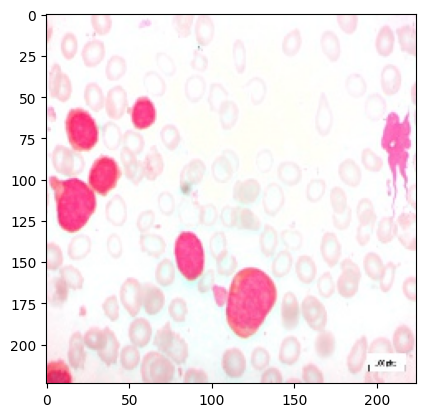

In [45]:
import PIL.Image as Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img = cv2.imread(str(images_dict['healthy'][0]))
plt.imshow(img)

In [39]:
def generator_model():
    #input layer
    input_layer = layers.Input(shape=(100,))
    #hidden layers
    x = layers.Dense(128*7*7)(input_layer)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Reshape((7,7,128))(x)
    x = layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Conv2D(1, (7,7), activation='tanh', padding='same')(x)
    #output layer
    output_layer = x
    #model
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [40]:
def save_model(model, name):
    if not os.path.exists('models'):
        os.makedirs('models')
    model.save('models/'+name+'.h5')
    print('Model saved to models/'+name+'.h5')

In [41]:
def show_summary(model):
    model.summary()